In [1]:
import os
from os.path import join, sep
from glob import glob
from random import choices

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dotenv import find_dotenv, load_dotenv

In [3]:
from src.addons.data.pipeline import test_pipeline, train_pipeline

---

In [4]:
_ = load_dotenv(find_dotenv())

In [5]:
images_path = glob(join(os.environ.get("RAW_PATH"), "tests") + sep + "*.jpg")
images_path = choices(images_path, k=30)

---

In [6]:
tests = test_pipeline(paths=images_path, batch=1)

2023-12-25 23:28:48.768223: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-25 23:28:48.768252: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-25 23:28:48.768256: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-25 23:28:48.768289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 23:28:48.768308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2023-12-25 23:28:48.852590: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


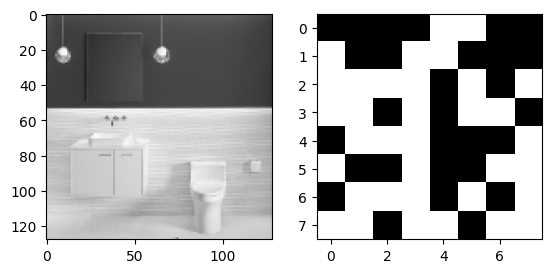

In [7]:
for batch, (img, mark) in enumerate(tests.take(1)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img[0].numpy(), cmap="gray")
    ax2.imshow(mark[0].numpy(), cmap="gray")

---

In [8]:
trains = train_pipeline(paths=images_path, batch=2)

2023-12-25 23:28:49.353100: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


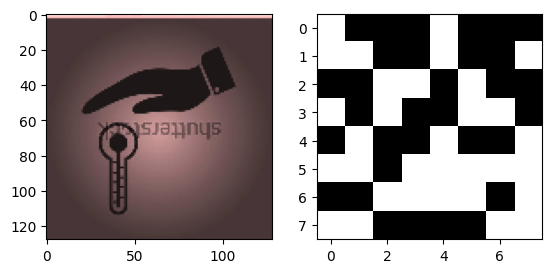

In [9]:
for img, mark in trains:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(tf.cast(img, tf.uint8)[0].numpy(), cmap="gray")
    ax2.imshow(mark[0].numpy(), cmap="gray")
    break